In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import seaborn as sns
from tensorflow.keras import datasets, layers, models

In [2]:
(training_images, training_labels), (testing_images, testing_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 15s 0us/step


In [3]:
training_images, testing_images = training_images/255, testing_images/255

class_names = ['Plane','Car', 'Bird', 'Cat', 'Dear', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

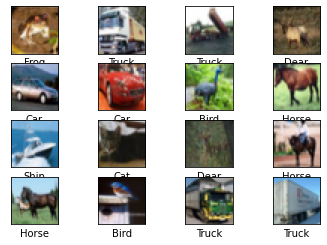

In [9]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(training_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[training_labels[i][0]])
    
plt.show()

In [10]:
#reduce the number of images used in the model
training_images = training_images[:20000]
training_labels = training_labels[:20000]
testing_images = testing_images[:4000]
testing_labels = testing_labels[:4000]

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, validation_data=(testing_images, testing_labels))

Epoch 1/10
625/625 [==============================] - 14s 22ms/step - loss: 1.8071 - accuracy: 0.3277 - val_loss: 1.4923 - val_accuracy: 0.4487
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 1.4223 - accuracy: 0.4870 - val_loss: 1.3553 - val_accuracy: 0.5163
Epoch 3/10
625/625 [==============================] - 14s 22ms/step - loss: 1.2676 - accuracy: 0.5465 - val_loss: 1.2401 - val_accuracy: 0.5505
Epoch 4/10
625/625 [==============================] - 16s 26ms/step - loss: 1.1606 - accuracy: 0.5861 - val_loss: 1.2361 - val_accuracy: 0.5502
Epoch 5/10
625/625 [==============================] - 16s 25ms/step - loss: 1.0671 - accuracy: 0.6226 - val_loss: 1.1419 - val_accuracy: 0.5910
Epoch 6/10
625/625 [==============================] - 15s 24ms/step - loss: 0.9918 - accuracy: 0.6499 - val_loss: 1.1211 - val_accuracy: 0.6105
Epoch 7/10
625/625 [==============================] - 16s 25ms/step - loss: 0.9263 - accuracy: 0.6712 - val_loss: 1.0375 - val_accuracy:

In [13]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print(f'Loss: {loss}')
print(f'Accuracy : {accuracy}')

model.save("Image_classifier.model")

125/125 [==============================] - 1s 11ms/step - loss: 1.0907 - accuracy: 0.6417
Loss: 1.0906707048416138
Accuracy : 0.6417499780654907


INFO:tensorflow:Assets written to: Image_classifier.model\assets


INFO:tensorflow:Assets written to: Image_classifier.model\assets


In [14]:
model = models.load_model("Image_classifier.model")

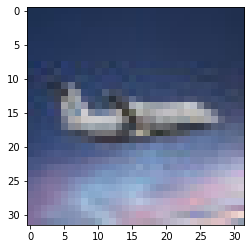

In [15]:
img = cv.imread('plane.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

In [17]:
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 138ms/step
Prediction is Plane


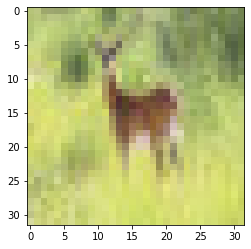

In [39]:
img = cv.imread('dear.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img, cmap=plt.cm.binary)

In [40]:
prediction = model.predict(np.array([img]) / 255)
index = np.argmax(prediction)
print(f'Prediction is {class_names[index]}')

1/1 [==============================] - 0s 18ms/step
Prediction is Dear
